<a href="https://colab.research.google.com/github/cristianbg/Coursera-TensorFlowIntro/blob/main/TF_101_04_ClothingRecognitionWithConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# print(tf.__version__)   # 2.4.0

In [2]:
# use callback to stop training when 'accuracy'/'loss' reaches a threshold
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9):
        # if(logs.get('loss') < 0.4):
            print("\nReached 90% accuracy, so cancelling training")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# reshape the data, in order to be recognized by the convolution
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = tf.keras.Sequential([
                          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
                          tf.keras.layers.MaxPooling2D(2, 2),
                          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2, 2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation=tf.nn.relu),
                          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
model.evaluate(test_images, test_labels)

Without convolution
- training

Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.8976

- validation

313/313 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8762

With convolution
- training

Epoch 3/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2339 - accuracy: 0.9137

- validation

313/313 [==============================] - 4s 13ms/step - loss: 0.2662 - accuracy: 0.9003


In [6]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


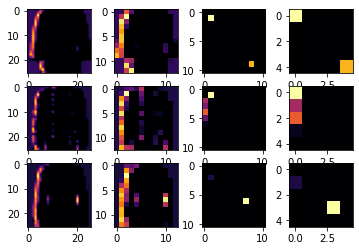

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4)

# 1-trousers  2   3   5
# 2-handbag
# 6-shirt     4   7  26
# 9-shoes     0  23  28

FIRST_IMAGE = 4
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 5

# use the 'layers API'
# create a list of layers outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# treat each item in the layer as an individual activation model
for x in range(0, 4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)

